# Student alcohol consumption EDA
- Some exploratory data analysis to find out if socio-economic, bad choises and other factors influence school grades from this gold [kaggle-data-set](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)

i want to find the answer to these questions:
1. Does weekday drinking hurt grades more than weekend drinking?
2. Do students with lower_edu/poorer parents do worse or better at school and consume less alchohol?
3. Do students that have a romantic relationship do worse at school?
4. Does student school absence equal worse grades?
5. Does family size influence school grades and alchohol consumption?
6. Do gifted kids (low study hours high grades) do better at school than hard working students (high study hours, high grades) 

---
Lets start with importing

In [16]:
import numpy as np
import pandas as pd

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (6, 4)


We have 2 datasets math grades and portugees grades. I chose the dataset of Math grades because math is harder to get a good score on without learning compared to languague course

In [18]:
df = pd.read_csv('data/archive/student-mat.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

All data is non-null and is there and shape is (395,33)

In [20]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
df.iloc[0]

school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            6
G1                  5
G2                  6
G3                  6
Name: 0, dtype: object

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


Here we can read relevant data to our questions for comparing grades we can mean of 'G1', 'G2', 'G3':
##### 1. Do students that travel longer to school do better at school and consume less alchohol?
Lets compare 'traveltime' (1-4) with alchohol consumption. lets mean the alchohol consumption into one column to compare the two (1-5).
##### 2. Do students with lower_edu/poorer parents do worse or better at school and consume less alchohol?
To answer question two lets make a scale in a seperate row of how rich/poor the parents are, we can take the sum of these columns for this scale: 'Medu', 'Fedu' (0-4)
##### 3. Do students that have a romantic relationship do worse at school?
We can compare 'romantic' column (yes/no) with the grades
##### 4. Does student school absence equal worse grades?
We can compare 'absences' (0-93) with grades
##### 5. Does family size influence school grades and alchohol consumption?
We can compare 'famsize' ('LE3' - less than three or 'GT3' - greater than 3)
##### 6. Do gifted kids (low study hours high grades) do better at school than hard working students (high study hours, high grades)
Lets compare these two in a lineplot


<Axes: xlabel='traveltime', ylabel='count'>

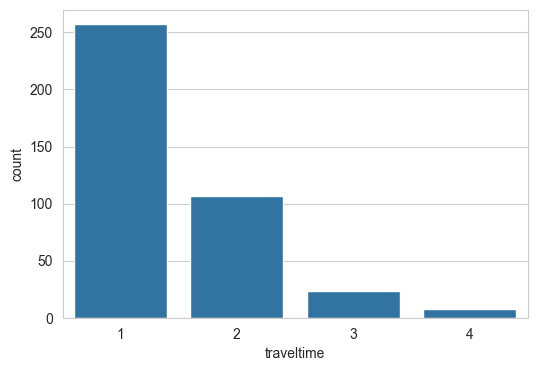

In [23]:
sns.countplot(x='traveltime', data=df)

Okay we see that a lot of students take <15 minutes to go to school and only a few that take less than an hour

In [28]:
df['grade_mean'] = df[['G1', 'G2', 'G2']].mean(axis=1)

<Axes: xlabel='Dalc', ylabel='grade_mean'>

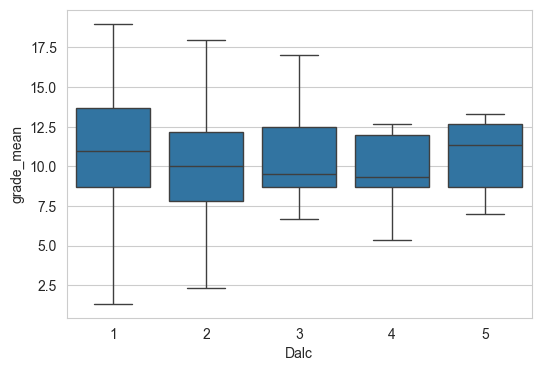

In [29]:
sns.boxplot(x='Dalc', y='grade_mean', data=df)

We can see that it barely influeces it

<Axes: xlabel='Walc', ylabel='grade_mean'>

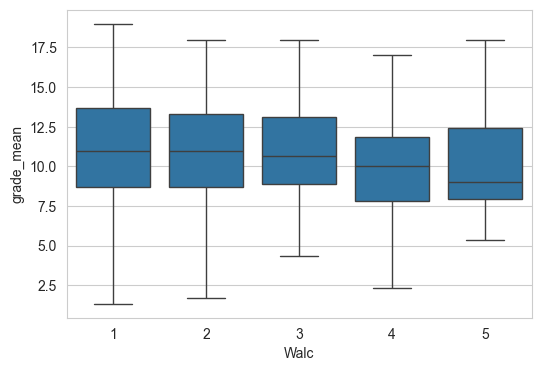

In [30]:
sns.boxplot(x='Walc', y='grade_mean', data=df)

its still a small difference but we can clearly see that if you drink during weekends you can still get good grades but heavy drinkers during weekdays dont fall in high grades though the average is almost the same